In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

pd.options.mode.chained_assignment = None

file_path = "./data2/mp_last_new.csv" #data from: https://mega.nz/file/2dRGGb4a#QuJTK24PDDqQOfzrwacoGRweA9TEInQu_SGT4y0mALs

In [35]:
with open(file_path, "r") as file:
    df = pd.read_csv(file)
df = df[(df["nation"] != "Drones")]
order = [
    "USA",
    "Germany",
    "USSR",
    "Great Britain",
    "Japan",
    "China",
    "Italy",
    "France",
    "Sweden",
    "Israel",
]
df["nation"] = pd.Categorical(df.nation, ordered=True, categories=order)
df["date"] = pd.to_datetime(df["date"])
df["win"] = df["win"] == "t"

In [36]:
df_br_nation = df[["max_rank", "nation"]]
df_br_nation["diff_rank"] = df["top_battle_rank"] - df["max_rank"]
df_br_nation["max_rank"] = np.round(df_br_nation["max_rank"] / 3, 1) + 1
df_br_nation["diff_rank"] = np.round(df_br_nation["diff_rank"] / 3, 1)
df_br_nation = df_br_nation[df_br_nation["diff_rank"] <= 1]

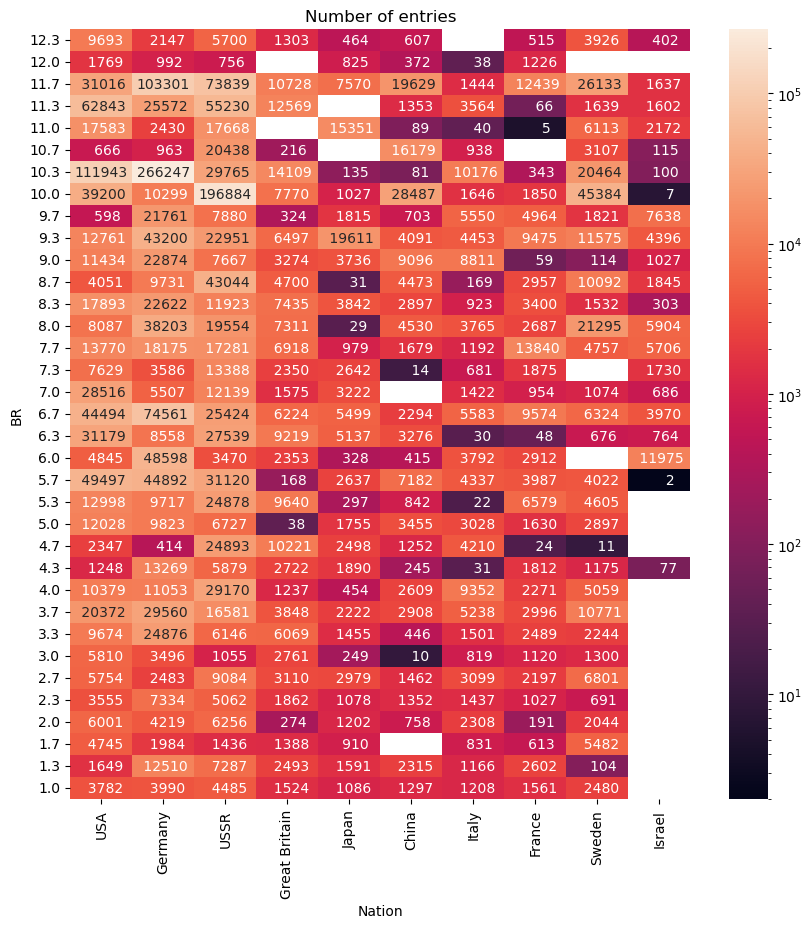

In [37]:
df_br_nation_s = df_br_nation.groupby(
    ["max_rank", "nation"], observed=False, as_index=False
).agg(["count", "mean"])
df_br_nation_s.columns = ["max_rank", "nation", "count", "diff_rank"]

plt.subplots(figsize=(10, 10))
sns.heatmap(
    df_br_nation_s.pivot(index="max_rank", columns="nation", values="count").sort_index(
        ascending=False
    ),
    annot=True,
    fmt="6d",
    cmap="rocket",
    norm=LogNorm(),
)
plt.xlabel("Nation")
plt.ylabel("BR")
plt.title("Number of entries")
plt.show()

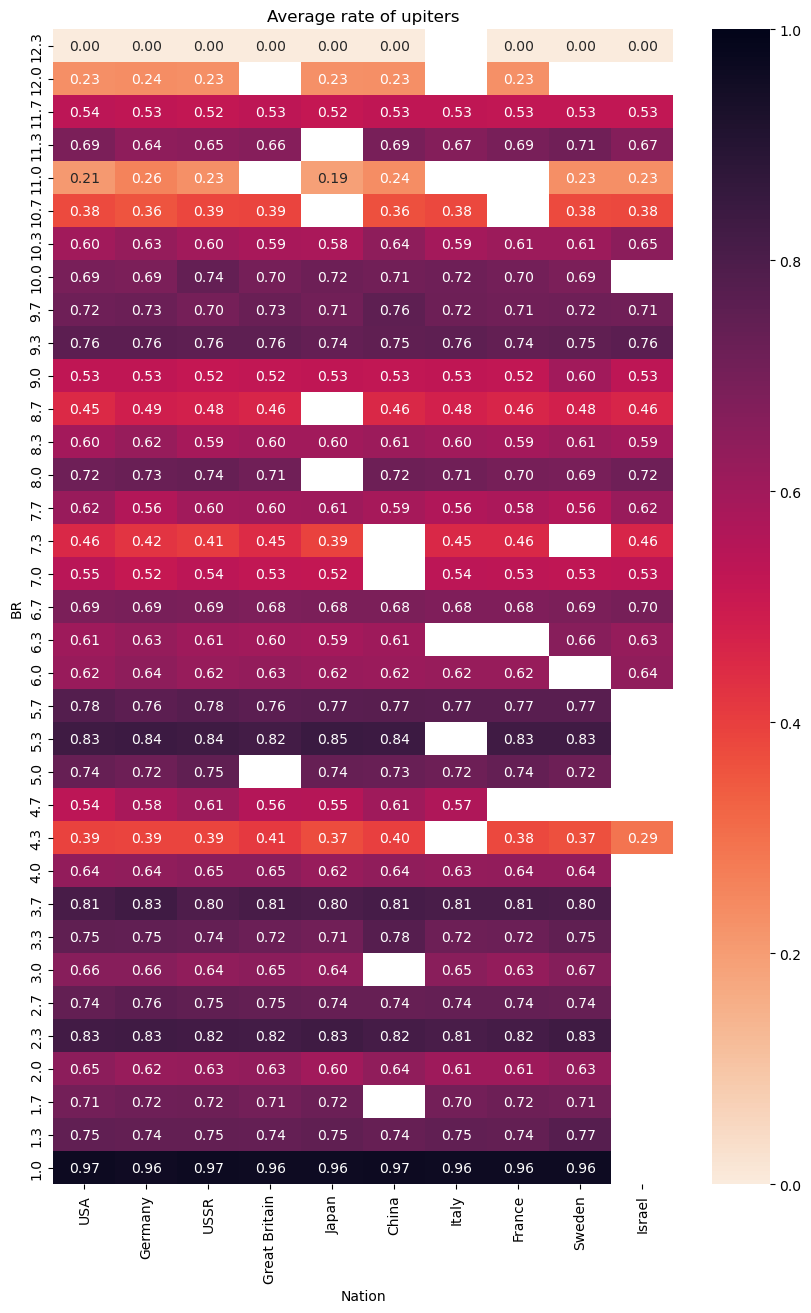

In [38]:
df_br_nation_avg = (
    df_br_nation_s[df_br_nation_s["count"] > 50]
    .pivot(index="max_rank", columns="nation", values="diff_rank")
    .sort_index(ascending=False)
)

plt.subplots(figsize=(10, 15))
sns.heatmap(df_br_nation_avg, annot=True, fmt=".2f", vmin=0, vmax=1, cmap="rocket_r")
plt.xlabel("Nation")
plt.ylabel("BR")
plt.title("Average rate of upiters")
plt.show()

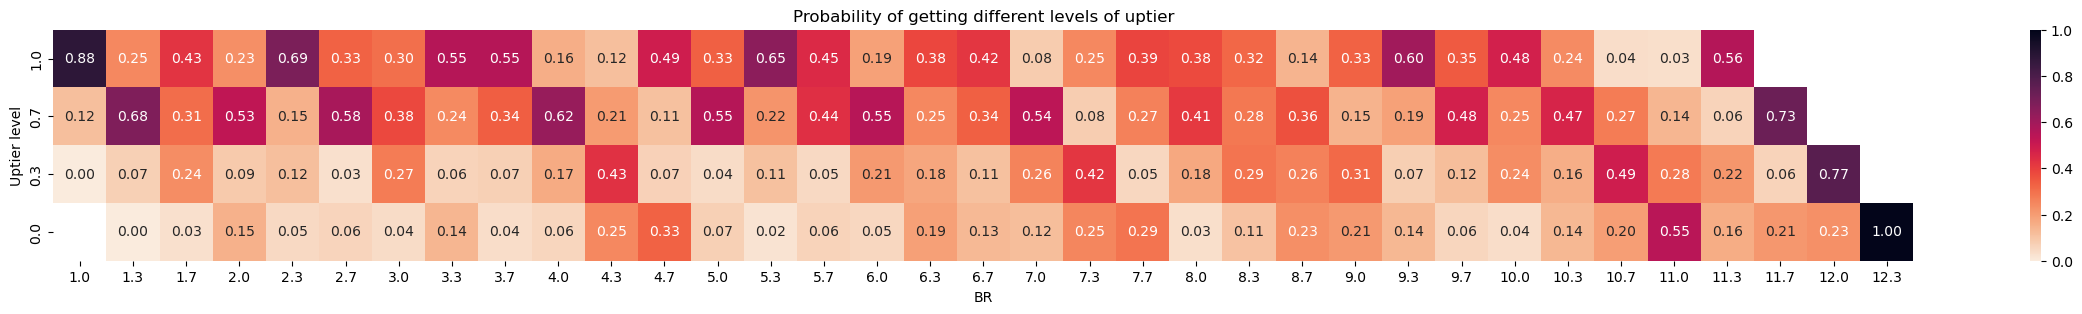

In [39]:
df_br_proportion = (
    df_br_nation.groupby(["max_rank"], observed=False, as_index=False)["diff_rank"]
    .value_counts(normalize=True)
    .pivot(index="diff_rank", columns="max_rank", values="proportion")
    .sort_index(level="diff_rank", ascending=False)
)

plt.subplots(figsize=(30, 3))
sns.heatmap(df_br_proportion, annot=True, fmt=".2f", vmin=0, vmax=1, cmap="rocket_r")
plt.xlabel("BR")
plt.ylabel("Uptier level")
plt.title("Probability of getting different levels of uptier")
plt.show()

In [40]:
df_s = df[["max_rank", "nation", "air_kills", "ground_kills", "deaths", "win", "date"]]
df_s["max_rank"] = np.round(df_s["max_rank"] / 3, 1) + 1

df_stat_time = df_s.groupby(
    [df_s["date"].dt.floor("8H"), "nation", "max_rank"], observed=False
)[["air_kills", "ground_kills", "deaths", "win"]].mean()

df_stat_time["kd"] = (df_stat_time["air_kills"] + df_stat_time["ground_kills"]) / (
    df_stat_time["deaths"] + 0.001
)

df_stat_time = df_stat_time[["kd", "win"]].reset_index()


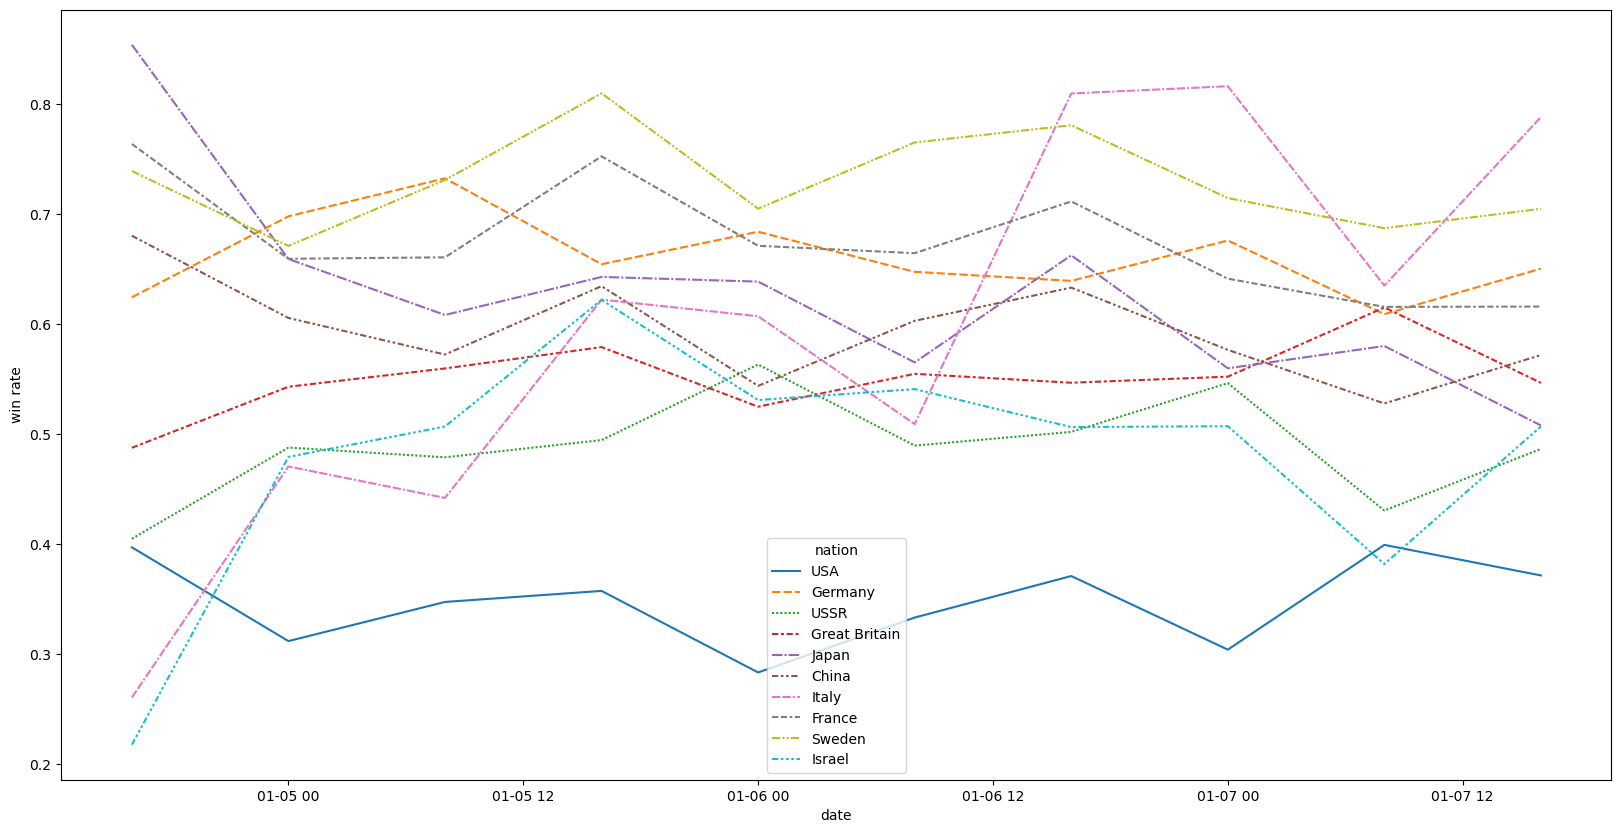

In [41]:
df_stat_time_toptier = (
    df_stat_time[df_stat_time["max_rank"] >= 11.7]
    .groupby(["date", "nation"], observed=False, as_index=False)[["kd", "win"]]
    .mean()
    .pivot(index="date", columns="nation", values=["kd", "win"])
)

plt.subplots(figsize=(20, 10))
sns.lineplot(df_stat_time_toptier["win"])
plt.ylabel("win rate")
plt.show()